# 서울시 기간별 시간평균 대기환경 정보 데이터 분석
- 데이터 제공 (서울 열린데이터 광장, 서울시 기간별 시간평균 대기환경 정보)
- > https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2221&srvType=S&serviceKind=1&currentPageNo=1

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

### 대기환경 정보 데이터를 불러옵니다.
서울시 기간별 시간평균 대기환경 정보.csv

In [2]:
# pd.read_csv('../data/...')
df = pd.read_csv('../data/서울시기간별시간평균대기환경정보.csv', encoding='CP949')
# encoding='CP949'
df.head()

,시간,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,201908161200,100,도심권,111123,종로구,15,12,9,0.022,0.018,0.4,0.004
1,201908161200,100,도심권,111131,용산구,13,11,9,0.029,0.018,0.4,0.003
2,201908161200,100,도심권,111121,중구,16,12,9,0.024,0.018,0.1,0.002
3,201908161200,101,서북권,111201,마포구,0,0,13,0.027,0.012,0.6,0.004
4,201908161200,101,서북권,111181,은평구,20,18,13,0.027,0.017,0.4,0.004


In [3]:
# 컬럼정보를 확인하세요
print(df.columns)

Index(['시간', '권역코드', '권역명', '측정소코드', '측정소명', '미세먼지 1시간(㎍/㎥)', '미세먼지 24시간(㎍/㎥)',
       '초미세먼지(㎍/㎥)', '오존(ppm)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스농도(ppm)'],
      dtype='object')


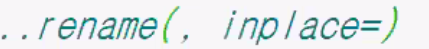

In [4]:
# 시간 컬럼의 이름을 측정일시로 바꿔주세요
df.rename(columns={'시간':'측정일시'}, inplace=True)


In [5]:
# df의 정보를 조회하세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36925 entries, 0 to 36924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            36925 non-null  int64  
 1   권역코드            36925 non-null  int64  
 2   권역명             36925 non-null  object 
 3   측정소코드           36925 non-null  int64  
 4   측정소명            36925 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   36925 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  36925 non-null  int64  
 7   초미세먼지(㎍/㎥)      36925 non-null  int64  
 8   오존(ppm)         36464 non-null  float64
 9   이산화질소농도(ppm)    36595 non-null  float64
 10  일산화탄소농도(ppm)    36472 non-null  float64
 11  아황산가스농도(ppm)    36580 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.4+ MB


In [6]:
pd.to_datetime(df['측정일시'])

0       1970-01-01 00:03:21.908161200
1       1970-01-01 00:03:21.908161200
2       1970-01-01 00:03:21.908161200
3       1970-01-01 00:03:21.908161200
4       1970-01-01 00:03:21.908161200
                     ...             
36920   1970-01-01 00:03:21.906160000
36921   1970-01-01 00:03:21.906160000
36922   1970-01-01 00:03:21.906160000
36923   1970-01-01 00:03:21.906160000
36924   1970-01-01 00:03:21.906160000
Name: 측정일시, Length: 36925, dtype: datetime64[ns]

In [7]:
# 측정일시 컬럼의 data type을 datetime으로 바꾸고 다시 df 정보를 확인합니다.

df['측정일시']= pd.to_datetime(df['측정일시'],format='%Y%m%d%H%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36925 entries, 0 to 36924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   측정일시            36925 non-null  datetime64[ns]
 1   권역코드            36925 non-null  int64         
 2   권역명             36925 non-null  object        
 3   측정소코드           36925 non-null  int64         
 4   측정소명            36925 non-null  object        
 5   미세먼지 1시간(㎍/㎥)   36925 non-null  int64         
 6   미세먼지 24시간(㎍/㎥)  36925 non-null  int64         
 7   초미세먼지(㎍/㎥)      36925 non-null  int64         
 8   오존(ppm)         36464 non-null  float64       
 9   이산화질소농도(ppm)    36595 non-null  float64       
 10  일산화탄소농도(ppm)    36472 non-null  float64       
 11  아황산가스농도(ppm)    36580 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 3.4+ MB


In [8]:
# df에 누락데이터가 있는지 컬럼마다 누락데이터의 개수를 확인합니다.
df.isnull().sum()

측정일시                0
권역코드                0
권역명                 0
측정소코드               0
측정소명                0
미세먼지 1시간(㎍/㎥)       0
미세먼지 24시간(㎍/㎥)      0
초미세먼지(㎍/㎥)          0
오존(ppm)           461
이산화질소농도(ppm)      330
일산화탄소농도(ppm)      453
아황산가스농도(ppm)      345
dtype: int64

In [9]:
# df의 오존(ppm) 컬럼에 누락데이터를 포함하고 있는 행의 측정일시와 측정소코드, 오존(ppm) 만 출력해보세요. 
df[df['오존(ppm)'].isnull()][['측정일시','측정소코드','오존(ppm)']]

,측정일시,측정소코드,오존(ppm)
1699,2019-08-13 17:00:00,111273,NaN
1722,2019-08-13 16:00:00,111273,NaN
1732,2019-08-13 15:00:00,111171,NaN
1747,2019-08-13 15:00:00,111273,NaN
1758,2019-08-13 14:00:00,111171,NaN
...,...,...,...
35962,2019-06-17 14:00:00,111142,NaN
35970,2019-06-17 14:00:00,111251,NaN
35987,2019-06-17 13:00:00,111152,NaN
36047,2019-06-17 11:00:00,111262,NaN


In [10]:
# df에 있는 누락 데이터들을 0으로 바꿔주세요
df.fillna(0)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2019-08-16 12:00:00,100,도심권,111123,종로구,15,12,9,0.022,0.018,0.4,0.004
1,2019-08-16 12:00:00,100,도심권,111131,용산구,13,11,9,0.029,0.018,0.4,0.003
2,2019-08-16 12:00:00,100,도심권,111121,중구,16,12,9,0.024,0.018,0.1,0.002
3,2019-08-16 12:00:00,101,서북권,111201,마포구,0,0,13,0.027,0.012,0.6,0.004
4,2019-08-16 12:00:00,101,서북권,111181,은평구,20,18,13,0.027,0.017,0.4,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...
36920,2019-06-16 00:00:00,103,서남권,111241,동작구,22,27,12,0.021,0.029,0.4,0.002
36921,2019-06-16 00:00:00,104,동남권,111262,서초구,19,27,14,0.038,0.012,0.2,0.003
36922,2019-06-16 00:00:00,104,동남권,111273,송파구,27,31,15,0.016,0.032,0.4,0.002
36923,2019-06-16 00:00:00,104,동남권,111261,강남구,16,21,9,0.030,0.013,0.3,0.005


In [11]:
# 초 미세먼지 농도가 높은 순으로 정렬하여 10개만 출력해보세요.

df.sort_values(by=['초미세먼지(㎍/㎥)'], ascending=False).head(10)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
17933,2019-07-17 15:00:00,102,동북권,111142,성동구,128,76,98,0.057,0.043,0.6,0.005
17860,2019-07-17 18:00:00,102,동북권,111142,성동구,107,90,92,0.093,0.026,0.6,0.008
17883,2019-07-17 17:00:00,102,동북권,111142,성동구,115,88,91,0.084,0.030,0.6,0.006
17475,2019-07-18 09:00:00,100,도심권,111131,용산구,0,66,91,0.022,0.035,0.7,0.004
17908,2019-07-17 16:00:00,102,동북권,111142,성동구,118,83,90,0.085,0.031,0.6,0.005
17461,2019-07-18 10:00:00,102,동북권,111142,성동구,117,83,90,0.031,0.038,0.7,0.006
17491,2019-07-18 09:00:00,103,서남권,111241,동작구,99,80,87,0.012,0.033,0.6,0.004
17517,2019-07-18 08:00:00,103,서남권,111241,동작구,105,78,87,0.008,0.037,0.6,0.003
17436,2019-07-18 11:00:00,102,동북권,111142,성동구,92,83,86,0.057,0.034,0.7,0.005
17443,2019-07-18 11:00:00,103,서남권,111212,강서구,105,68,86,0.052,0.032,0.7,0.005


In [12]:
# 미세먼지 24시간 농도가 낮은 순으로 정렬하여 마지막 10개만 출력해보세요.

df.sort_values(by=['미세먼지 24시간(㎍/㎥)'] , ascending=False).tail(10)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
19835,2019-07-14 11:00:00,102,동북권,111141,광진구,0,0,53,0.048,0.011,0.8,0.004
19829,2019-07-14 11:00:00,101,서북권,111181,은평구,0,0,0,NaN,NaN,NaN,NaN
19827,2019-07-14 11:00:00,100,도심권,111131,용산구,0,0,40,0.068,0.012,0.5,0.003
19814,2019-07-14 12:00:00,103,서남권,111221,구로구,0,0,54,0.077,0.013,0.4,0.005
19804,2019-07-14 12:00:00,101,서북권,111181,은평구,0,0,0,NaN,NaN,NaN,NaN
19800,2019-07-14 12:00:00,100,도심권,111131,용산구,0,0,39,0.081,0.014,0.5,0.003
19791,2019-07-14 13:00:00,103,서남권,111221,구로구,0,0,53,0.092,0.009,0.4,0.004
19778,2019-07-14 13:00:00,101,서북권,111181,은평구,0,0,0,NaN,NaN,NaN,NaN
19775,2019-07-14 13:00:00,100,도심권,111131,용산구,0,0,37,0.092,0.014,0.5,0.003
17227,2019-07-18 19:00:00,100,도심권,111131,용산구,0,0,68,0.115,0.054,0.6,0.004


 sueup@daum.net